<a href="https://colab.research.google.com/github/Surya8055/Segmentation-of-Urban-spatial-order-street-network-orientation-configuration-and-entropy/blob/Urban-Spatial-Order-Entropy/USO_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentation of Urban spatial order: street network orientation, configuration, and entropy**

###**Done By:** Surya Vinay Kumar

###**Disclaimer**

This project, authored by Surya Vinay Kumar, emphasizes originality and academic integrity. Any form of plagiarism is strictly prohibited. Proper credits and citations must be included whenever referencing or utilizing this project to uphold ethical standards and acknowledge the author's contributions.

## **Introduction**

This project focuses on Clustering of Urban spatial order: street network orientation, configuration, and entropy. This project is based on a research paper which was published on 23rd August, 2019. The research paper can be found [here](https://appliednetsci.springeropen.com/articles/10.1007/s41109-019-0189-1#Abs1)

The primary goal of this project is to understand K-Means and Hierarchial clustering techniques. Additionally, we also focus on concepts like silhoutte coefficient and elbow method.

## **Key Terminologies**

**𝛟** = The normalized measure of orientation-order, is introduced to assess where a city stands on a linear spectrum from completely disordered/uniform street orientations to perfectly ordered/grid-like orientations. Thus, a 𝛟 value of 0 indicates low order (i.e., perfect disorder and maximum entropy with a uniform distribution of streets in every direction) and a 𝛟 value of 1 indicates high order (i.e., a single perfectly-ordered idealized four-way grid and minimal possible entropy).

**Ho** = Shannon entropy of the unweighted or simplified street orientations within a city's road network. Shannon entropy is a measure of uncertainty or information content in a probability distribution. In this case, Ho
quantifies the uncertainty or randomness associated with the distribution of street orientations when the topology of the street network is simplified.

**Hw** = Weighted entropy of the street orientations within a city's road network. Weighted entropy is a measure of uncertainty or information content associated with the distribution of values, where each value is weighted by a certain factor. In this case, each street segment's orientation is weighted by its length.

**The Shannon entropy formula captures the idea that higher entropy values indicate a more uniform or evenly distributed set of orientations, while lower entropy values suggest a more ordered or concentrated distribution.**

**l** = The median street segment length is a statistical measure that represents the middle value of the distribution of street segment lengths within a city's road network. It is calculated by arranging all street segment lengths in ascending order and identifying the middle value.

**Ac** = The average circuity is a measure that characterizes the average curvature or indirectness of routes within a city's road network. Circuity is defined as the ratio of the actual path length traveled along a route to the straight-line or Euclidean distance between the origin and destination of that route. A higher average circuity indicates that, on average, routes in the city's road network are more circuitous or indirect, deviating from straight-line paths. Conversely, a lower average circuity suggests more direct and efficient routes.

**K** = Average node degree is a network metric that quantifies the average number of edges (connections) incident to nodes in a network, where a node represents a point of intersection or connection in the network. A higher average node degree typically indicates a more connected and potentially complex road network with multiple streets intersecting at nodes. Conversely, a lower average node degree suggests a less connected network.

**Proportion of Nodes that are Dead-Ends (Pde)** =  Represents the proportion of nodes in the simplified graph that are dead-ends.

**Proportion of Nodes that are Four-Way Intersections (P4w)** = Represents the proportion of nodes in the simplified graph that are four-way intersections.

##**Step 1: Loading Data**

Before we start coding, let us first import all the required libraries and connect to google drive for this project.

In [44]:
from google.colab import drive
from google.colab import files
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
drive.mount('/content/drive')
%cd /content/drive/MyDrive/FDA/Dataset/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/FDA/Dataset


###**Reading the Dataset**

In [3]:
entropy_table = pd.read_excel('Project1_FDA_v1.xlsx')
entropy_table_copy = entropy_table # a copy is saved for validation
entropy_table

,Region,City,φ,Ho,Hw,I,Ac,K,Pde,P4w
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


### **Understanding the data**

Exploratory Data Analysis (EDA) is vital in any data science project. It helps us understand the dataset's structure and find areas for improvement. By examining column-wise attributes and row-level values, we uncover discrepancies like null values or outliers that can affect analysis. We scrutinize each feature's characteristics, such as data types and distributions, and investigate missing data points or anomalies. Visualizations like histograms and scatter plots provide insights into the data's structure, while correlation analysis helps understand feature interactions. By addressing these issues early, we ensure the reliability and robustness of our analyses.

In [4]:
entropy_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  100 non-null    object 
 1   City    100 non-null    object 
 2   φ       100 non-null    float64
 3   Ho      100 non-null    float64
 4   Hw      100 non-null    float64
 5   I       100 non-null    float64
 6   Ac      100 non-null    float64
 7   K       100 non-null    float64
 8   Pde     100 non-null    float64
 9   P4w     100 non-null    float64
dtypes: float64(8), object(2)
memory usage: 7.9+ KB


In [5]:
entropy_table.describe()

,φ,Ho,Hw,I,Ac,K,Pde,P4w
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


In [6]:
entropy_table['Region'].value_counts()

US/Canada             29
Europe                25
Asia/Oceania          23
Middle East/Africa    14
Latin America          9
Name: Region, dtype: int64

##**Step 2: Data Preprocessing**

The dataset exhibits a wide-ranging scale across its features, which can pose challenges for clustering models to effectively discern patterns and groupings. To address this, it's prudent to standardize the data, ensuring that the range of values across different features is similar. In this context, employing Minimum and Maximum scaling proves beneficial, as it transforms all data points to a common scale, typically ranging between 0 and 1.

By applying Minimum and Maximum scaling, we normalize the data, preserving the relative relationships between data points while bringing them within a consistent numerical range. This normalization facilitates the clustering process by mitigating the influence of features with larger magnitude variations, thereby ensuring that each feature contributes proportionally to the clustering algorithm's decision-making process.

In essence, Minimum and Maximum scaling enhances the clustering model's ability to identify meaningful patterns in the data, leading to more accurate and interpretable clustering results. Additionally, it promotes better convergence and stability in the clustering algorithm, optimizing its performance across diverse datasets and facilitating more robust insights into the underlying structure of the data.


Maintaining a uniform scale across variables is important for both K-means and Hierarchical clustering for several reasons:

**Sensitivity to Magnitudes:**

K-means clustering and Hierarchical clustering are distance-based algorithms. The distance between data points is a crucial factor in determining the clusters. Variables with larger scales may contribute more to the distance calculations than variables with smaller scales. This can lead to clusters being dominated by variables with larger magnitudes.

**Impact on Cluster Formation:**

Variables with different scales can distort the shape of clusters and affect the assignment of data points to clusters. Clusters may be formed based on variables with larger scales, even if those variables are less meaningful or relevant to the underlying structure of the data.

**Standardization for K-means:**

K-means clustering relies on the concept of centroids, and the algorithm minimizes the sum of squared distances between data points and their respective cluster centroids.If the scales of variables are not uniform, variables with larger scales can disproportionately influence the calculation of distances and centroids. Standardizing (scaling to have mean=0 and standard deviation=1) variables ensures that each variable contributes equally to the clustering process.

**Hierarchical Clustering Dendrogram Interpretation:**

In Hierarchical clustering, the dendrogram visualizes the relationships between data points based on the chosen linkage method and distance metric. A uniform scale across variables ensures that the dendrogram accurately reflects the dissimilarity or similarity structure of the data. To address these issues, it is common practice to standardize or normalize the variables before applying clustering algorithms. Standardization involves transforming variables to have a mean of 0 and a standard deviation of 1. This ensures that all variables have a comparable scale, mitigating the impact of variable magnitudes on the clustering results.

In [7]:
numerical_features = entropy_table.select_dtypes(include=['float64', 'int64']).columns # considering only numerical attributes

scaler = MinMaxScaler()
entropy_table[numerical_features] = scaler.fit_transform(entropy_table[numerical_features])
normalized_data = scaler.fit_transform(entropy_table[numerical_features])
entropy_table

,Region,City,φ,Ho,Hw,I,Ac,K,Pde,P4w
0,Asia/Oceania,Bangkok,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262
1,Asia/Oceania,Beijing,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515
2,Asia/Oceania,Hanoi,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612
3,Asia/Oceania,Hong Kong,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417
4,Asia/Oceania,Jakarta,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058
96,US/Canada,St Louis,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767
97,US/Canada,Toronto,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913
98,US/Canada,Vancouver,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049


To ensure the accuracy of our data scaling process, let's visually compare the original dataset with the scaled dataset. This allows us to confirm that the scaling has been performed correctly and that the data's distribution remains consistent after transformation. By scrutinizing key features before and after scaling, we can validate the effectiveness of the technique and ensure that subsequent analyses are based on accurately scaled data. This step enhances the reliability and validity of our results.

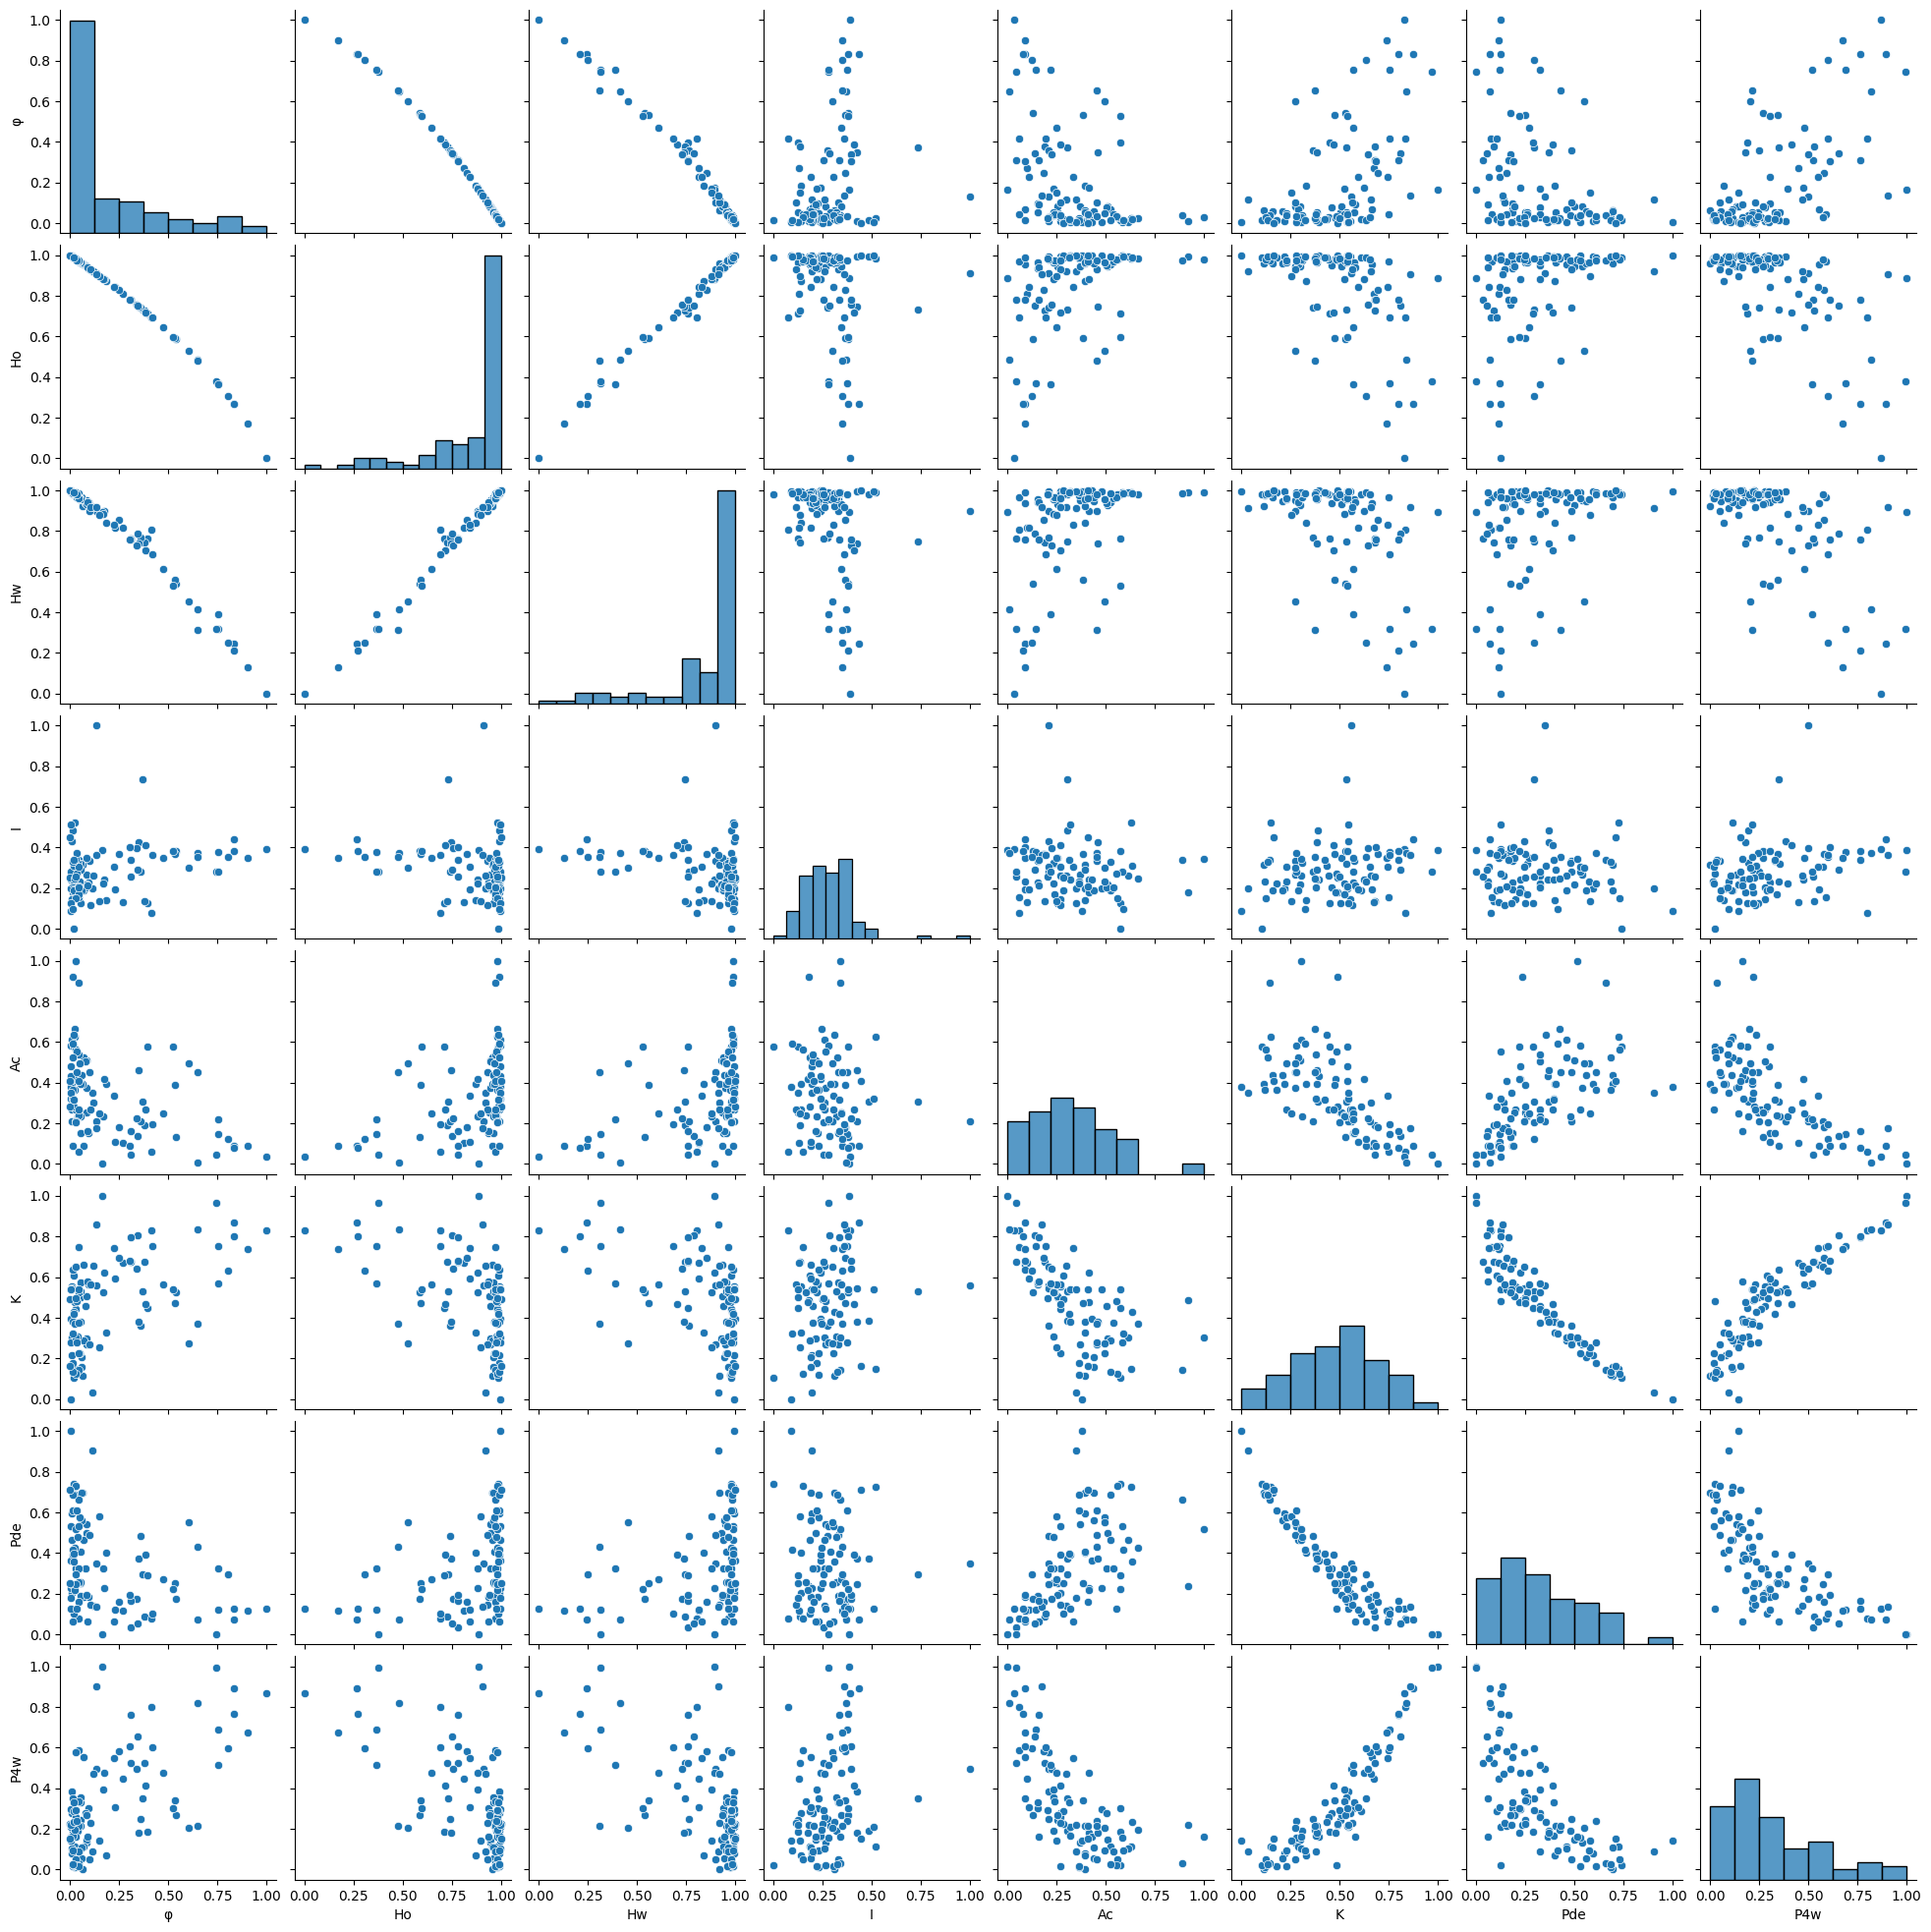

In [8]:
sns.pairplot(entropy_table) #scaled dataset

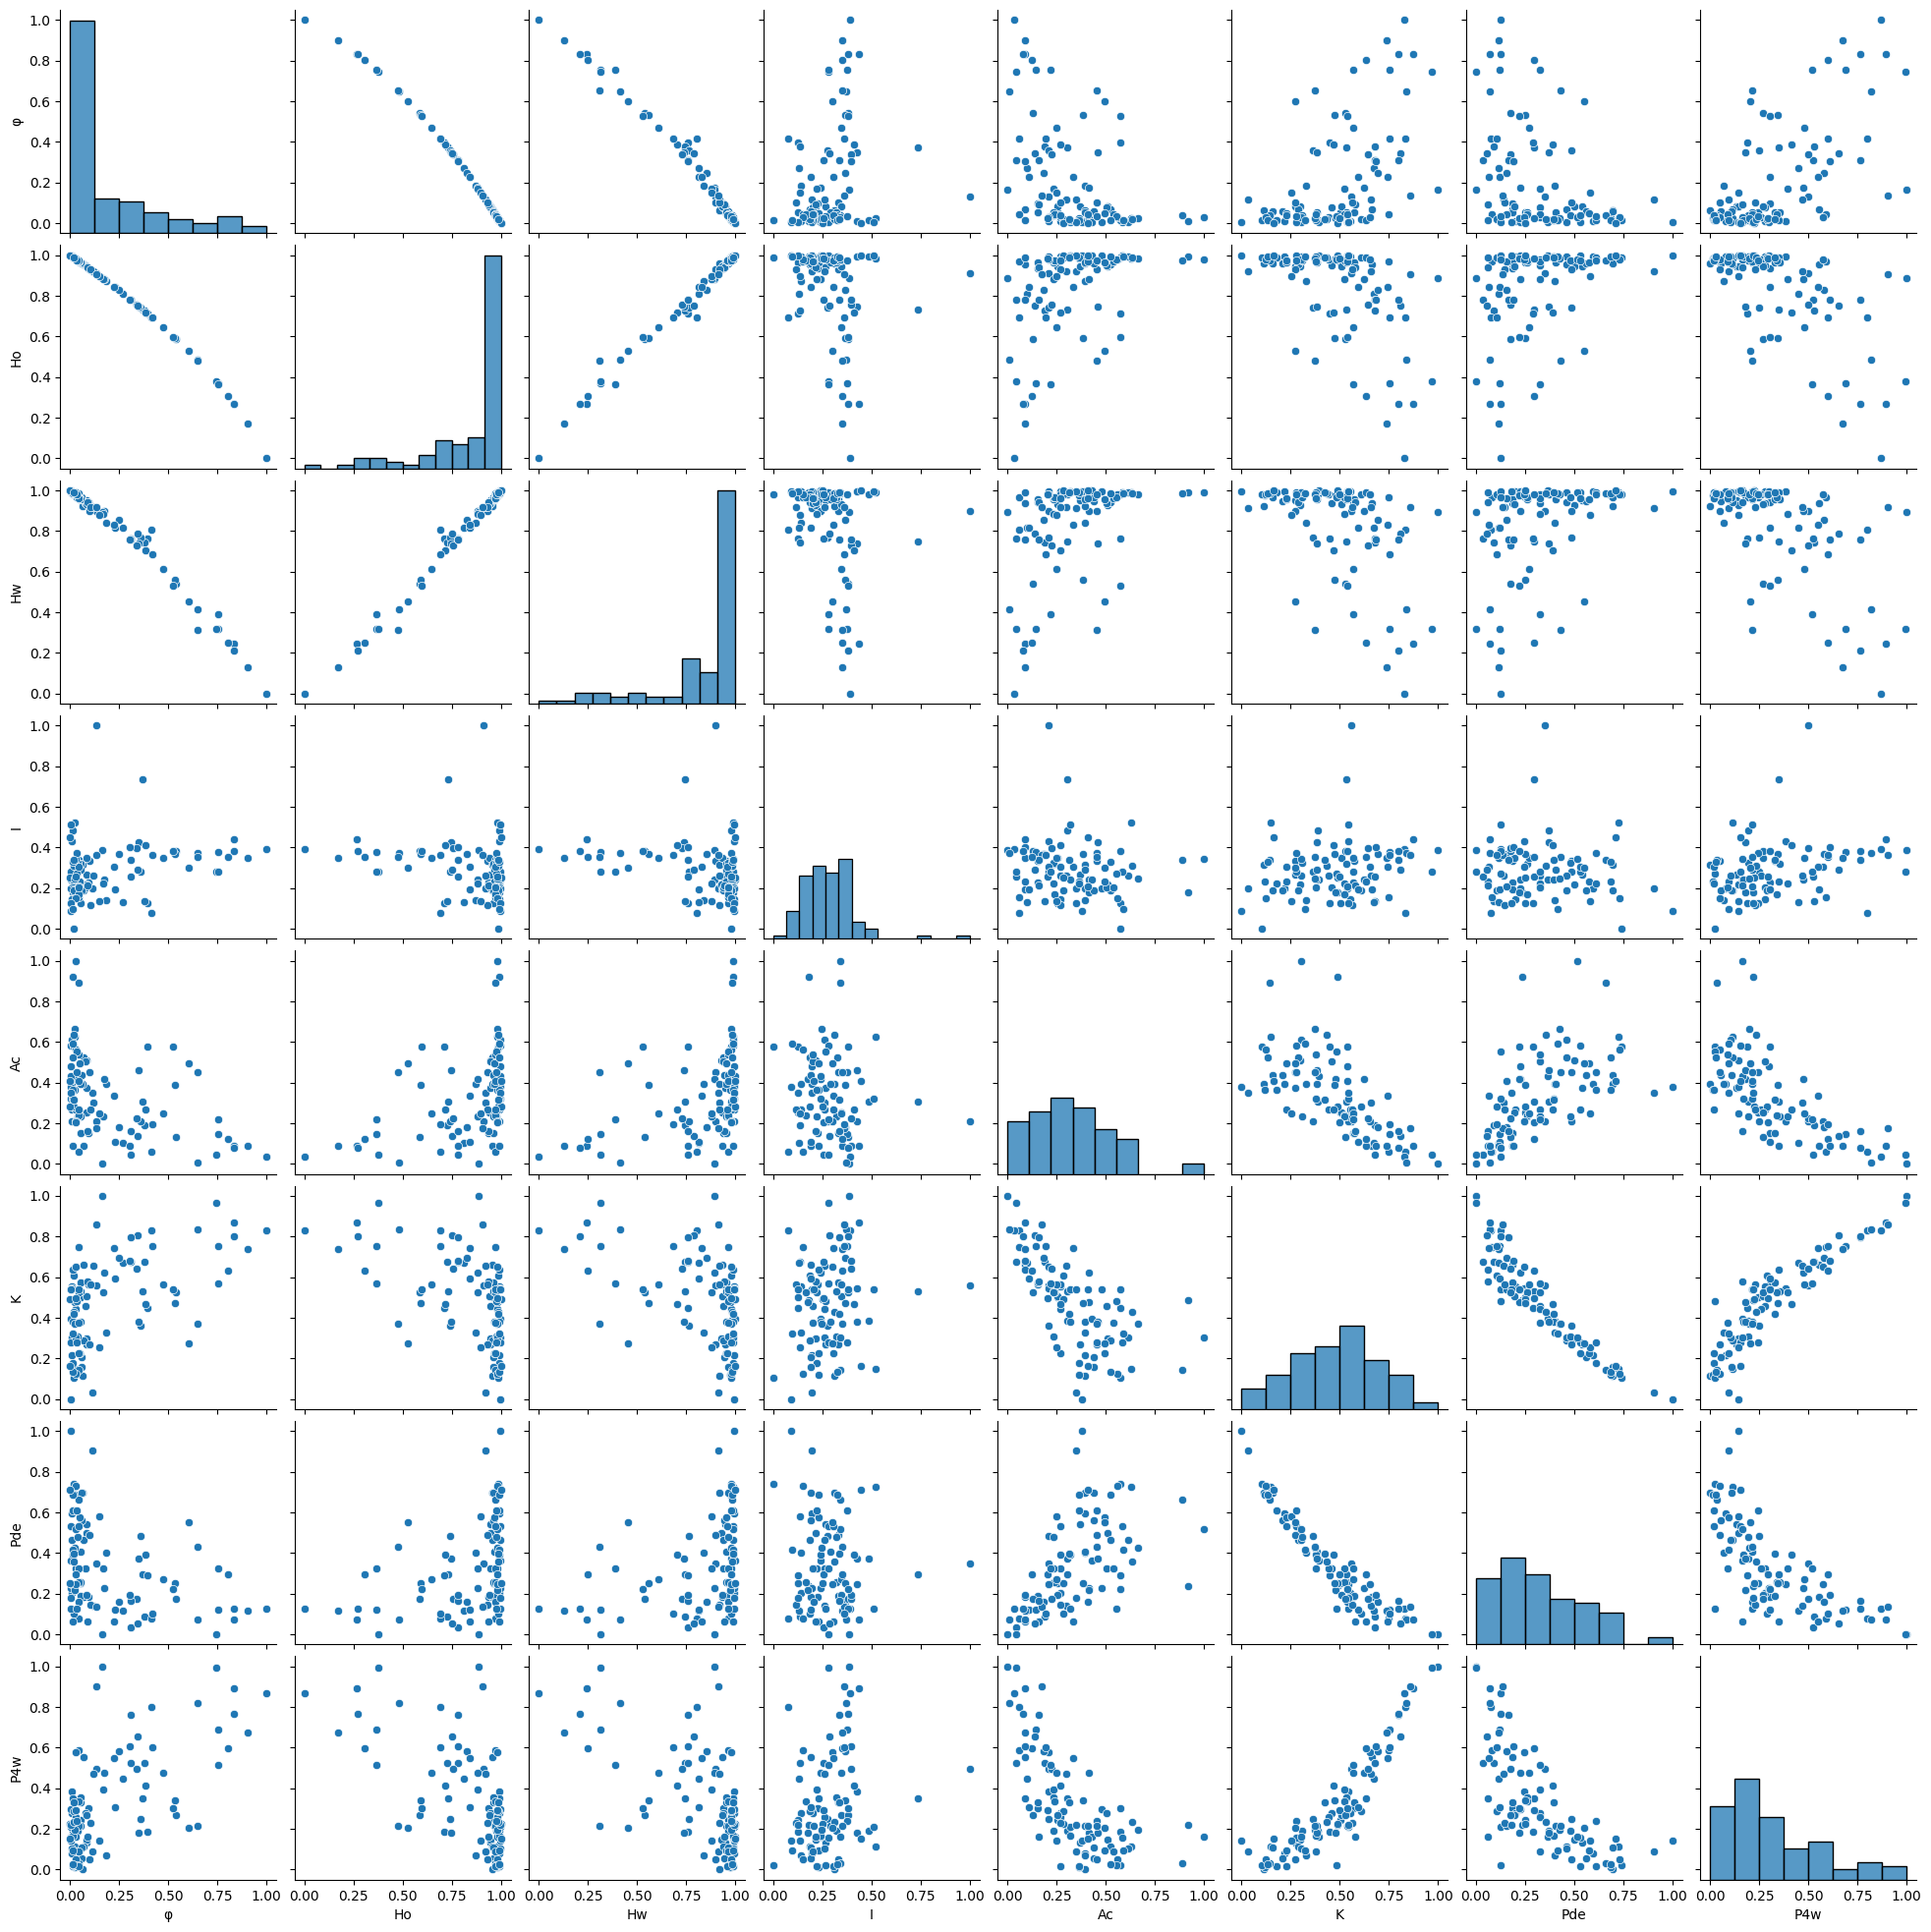

In [9]:
sns.pairplot(entropy_table_copy) #Initial Dataset

Based on the pairplot above, we observe striking similarities between the graphs before and after scaling. This similarity suggests that the dataset remains reliable even after scaling. Therefore, we can conclude that the scaling process has preserved the integrity of the data, maintaining its original characteristics and ensuring its suitability for further analysis.

##**Step 3: Elbow Method**

The next step in this project is to perform K-Means clustering. One challenge with this clustering technique is determining the optimal number of clusters. To address this, we utilize the elbow method, which helps identify the appropriate number of clusters by evaluating the within-cluster sum of squares (WCSS) for different values of k.

We perform K-Means clustering with k ranging from 1 to 10. For each value of k, we calculate the WCSS, which represents the sum of squared distances between each data point and its assigned cluster centroid. We then plot the WCSS against the number of clusters (k) and look for the 'elbow point' in the plot, where the rate of decrease in WCSS slows down significantly.

This 'elbow point' indicates the optimal number of clusters, as adding more clusters beyond this point does not significantly reduce the WCSS. Once we determine the optimal number of clusters using the elbow method, we can proceed with K-Means clustering using that value of k to segment the data into meaningful clusters.

In [10]:
l = []
wcss = []
for i in range(1,10):
  mdl = KMeans(n_clusters=i, n_init=10)
  mdl.fit(entropy_table.iloc[:,2:])
  l.append(i)
  wcss.append(mdl.inertia_)

<Axes: >

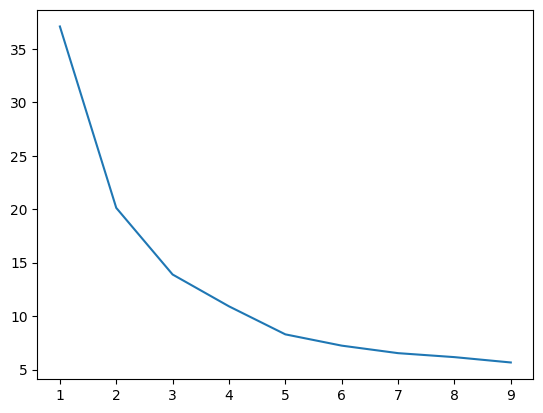

In [11]:
sns.lineplot(x = l, y = wcss)

Here, the identification of the elbow point might be ambiguous, suggesting that the optimal number of clusters could be either 2 or 3. To resolve this ambiguity and make a more informed decision, we can compute the silhouette coefficient for different numbers of clusters.

The silhouette coefficient measures the quality of clustering by assessing the similarity of data points within clusters and the dissimilarity between clusters. It ranges from -1 to 1, where a higher value indicates better-defined clusters.

By computing the silhouette coefficient for various numbers of clusters (e.g., 2 and 3 in this case), we can quantitatively evaluate the clustering performance and determine the optimal number of clusters based on the highest silhouette score.

Once we have determined the ideal number of clusters using the silhouette coefficient, we can confidently proceed with K-Means clustering using that number of clusters, ensuring that our clustering solution is well-supported by both the elbow method and silhouette analysis.

###**Silhoutte Method**

In [18]:
X = np.array(entropy_table.iloc[:,2:9])
# Y = np.array(df_clusters)

<Axes: >

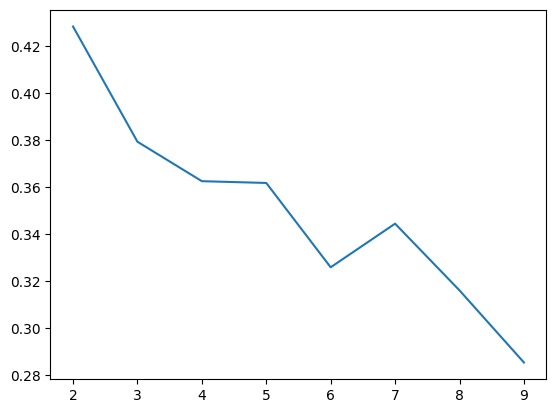

In [19]:
k=[]
ss=[]
for i in range (2,10):
  k.append(i)
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  labels = kmeans.predict(X)
  sils = metrics.silhouette_score(X, labels)
  ss.append(sils)
sns.lineplot(x = k, y = ss)

The silhouette method has provided us with the optimal solution, indicating that the ideal number of clusters for K-Means Clustering is 2. As demonstrated, k=2 yields a higher silhouette coefficient, signifying better clustering quality. Therefore, we will proceed with 2 clusters for this technique, ensuring a robust and effective clustering solution.

##**Step 4: K-Means Clustering**

Now that we've determined the optimal number of clusters for K-Means clustering, let's proceed with the clustering analysis. Utilizing the silhouette method, we identified that the ideal number of clusters is 2. This means that our dataset will be segmented into two distinct clusters. By performing K-Means clustering with this specified number of clusters, we aim to uncover meaningful patterns and groupings within the data. This analysis will provide valuable insights into the underlying structure of the dataset, enabling us to make informed decisions and derive actionable conclusions.

In [23]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(entropy_table.iloc[:,2:9])
entropy_table['Cluster_Group'] = kmeans.labels_

In [24]:
entropy_table

,Region,City,φ,Ho,Hw,I,Ac,K,Pde,P4w,Cluster_Group
0,Asia/Oceania,Bangkok,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,0
1,Asia/Oceania,Beijing,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,1
2,Asia/Oceania,Hanoi,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,0
3,Asia/Oceania,Hong Kong,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,0
4,Asia/Oceania,Jakarta,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,0
...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,1
96,US/Canada,St Louis,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,1
97,US/Canada,Toronto,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,1
98,US/Canada,Vancouver,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,1


The K-Means algorithm has successfully provided cluster assignments for each row in the dataset, categorizing them into two clusters labeled as 0 and 1. Now, it's our task to interpret these clusters and understand how the cities have been divided between them. By examining the characteristics and attributes of the data points within each cluster, such as city names, geographical features, population densities, and socioeconomic indicators, we can gain insights into the distinguishing factors that led to the clustering. This analysis will enable us to discern patterns and similarities among cities within the same cluster and identify any notable differences between clusters. Ultimately, understanding the distribution of cities across the clusters will provide valuable information for further analysis and decision-making in our project. Even before we do this, let us examine how the clusters come out in Hierarchial Clustering technique.

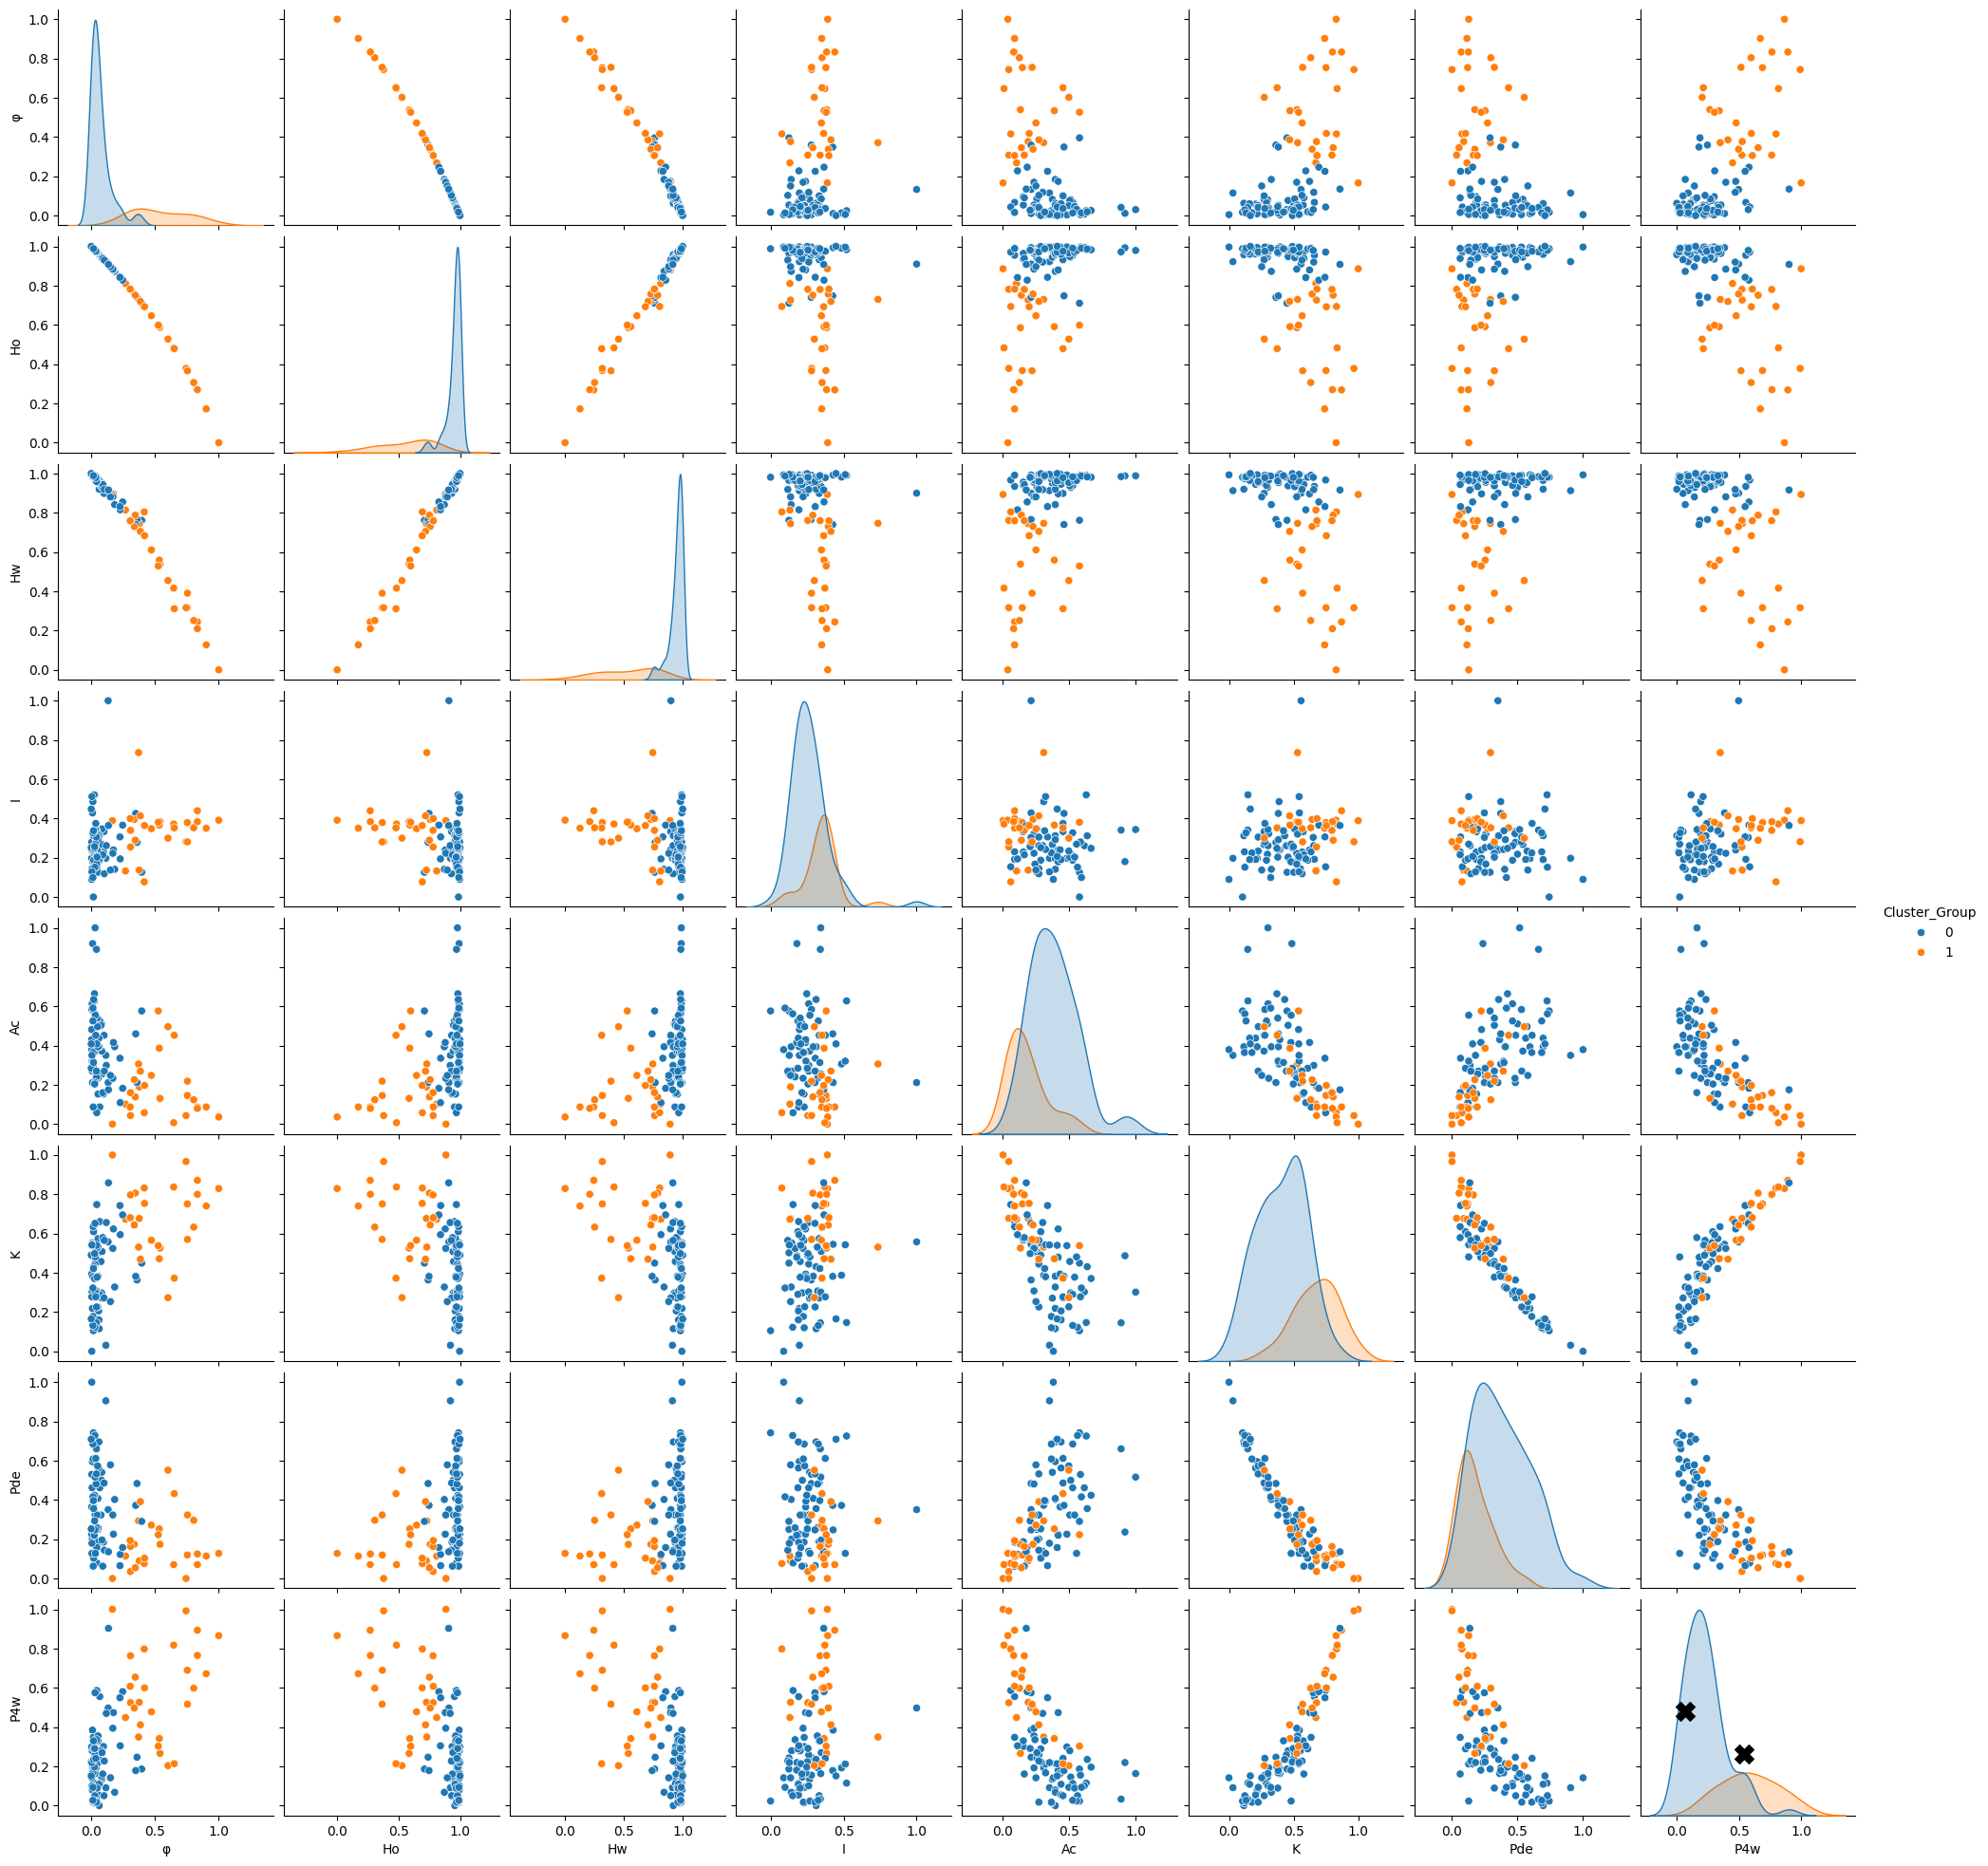

In [25]:
sns.pairplot(entropy_table,hue = 'Cluster_Group')
plt.scatter(mdl.cluster_centers_[:, 0], mdl.cluster_centers_[:, 1], marker='X', c='Black', s=200, label='Cluster Centers')
plt.show()

##**Step 5: Hierarchial Clustering**


Hierarchical clustering is an alternative clustering technique that organizes data into a hierarchical decomposition tree, commonly represented as a dendrogram. Unlike K-Means clustering, hierarchical clustering does not require the initialization of the number of clusters. Instead, it iteratively merges or splits clusters based on the similarity or dissimilarity between data points.

By constructing a dendrogram, hierarchical clustering provides a visual representation of the clustering process, offering insights into the hierarchical structure of the data and facilitating interpretation. This approach allows us to explore different levels of granularity in clustering, from a single cluster containing all data points to individual clusters for each data point.

Hierarchical clustering is particularly useful when the optimal number of clusters is not known a priori or when the data exhibits hierarchical relationships. By leveraging hierarchical clustering, we can gain a deeper understanding of the inherent structure of the dataset and uncover meaningful groupings that may not be apparent with other clustering techniques.

Let us perform Hierarchial clustering with the following linkage crieterias and understand them,

(i) Complete

(ii) Single

(iii) Average

(iv) Centeroid

###**Agglomerative Clustering**

Agglomerative clustering is a hierarchical clustering technique that iteratively merges individual data points or clusters based on their pairwise similarities or dissimilarities. It starts by considering each data point as a separate cluster and then proceeds to iteratively merge the closest pairs of clusters until only a single cluster remains.

In [35]:
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=2)
aggl.fit(entropy_table.iloc[:,2:9])
aggl.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0])

###**(i) Complete Linkage**

Complete linkage is a method used in hierarchical clustering to compute the distance between two clusters. It calculates the distance between the farthest (most dissimilar) points in the two clusters.

The advantage of complete linkage is that it tends to produce compact, spherical clusters, as it focuses on the most distant points when merging clusters. This can be beneficial when dealing with datasets containing non-convex clusters.

However, complete linkage can also be sensitive to outliers and noise, as it is influenced by the farthest points in the clusters. Additionally, it may struggle with elongated or irregularly shaped clusters, as it tends to merge clusters based solely on the distance between their most distant points.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [52.5, 52.5, 80.0, 80.0],
  [30.0, 30.0, 66.25, 66.25],
  [10.0, 10.0, 48.125, 48.125],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [160.0, 160.0, 192.5, 192.5],
  [135.0, 135.0, 176.25, 176.25],
  [110.0, 110.0, 155.625, 155.625],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [230.0, 230.0, 262.5, 262.5],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [292.5, 292.5, 330.0, 330.0],
  [246.25, 246.25, 311

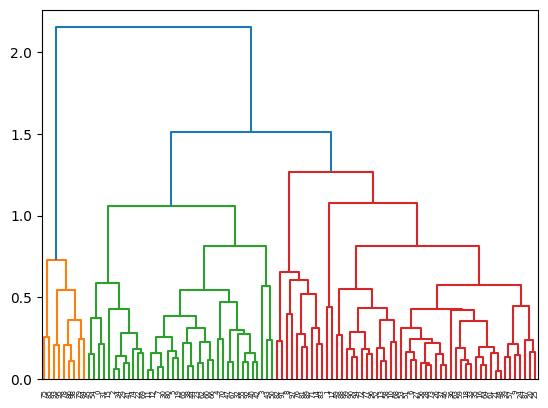

In [27]:
complete = linkage(entropy_table.iloc[:,2:9], method = 'complete')
dendrogram(complete)

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Assuming 'data' is your feature matrix
c, coph_dists = cophenet(complete, pdist(entropy_table.iloc[:,2:9]))
print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.7687433669647777


###**(ii) Single Linkage**

Single linkage is a method used in hierarchical clustering to compute the distance between two clusters. It calculates the distance between the closest (most similar) points in the two clusters.

The advantage of single linkage is that it tends to form elongated clusters, as it focuses on the closest points when merging clusters. This can be beneficial when dealing with datasets containing elongated or irregularly shaped clusters.

However, single linkage is sensitive to outliers and noise, as it can result in clusters being merged based on isolated points or small subclusters. Additionally, it may struggle with forming compact, well-separated clusters, as it tends to merge clusters based solely on the distance between their closest points.

{'icoord': [[45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [33.75, 33.75, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [51.875, 51.875, 90.0, 90.0],
  [15.0, 15.0, 70.9375, 70.9375],
  [105.0, 105.0, 115.0, 115.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [213.75, 213.75, 252.5, 252.5],
  [425.0, 425.0, 435.0, 435.0],
  [535.0, 535.0, 545.0, 545.0],
  [525.0, 525.0, 540.0, 540.0],
  [555.0, 555.0, 565.0, 565.0],
  [575.0, 575.0, 585.0, 585.0],
  [560.0, 560.0, 580.0, 580.0],
  [595.0, 595.0, 605.0, 605.0],
  [615.0, 615.0, 625.0, 625.0],
  [600.0, 600.0, 620.0, 620.0],
  [645.0, 645.0, 655.0, 655.0],
  [665.0, 665.0, 675.0, 675.0],
  [650.0, 650.0, 670.0, 670.0],
  [635.0, 635.0, 660.0, 660.0],
  [610.0, 610.0, 647.5, 647.5],
  [570.0, 570.0,

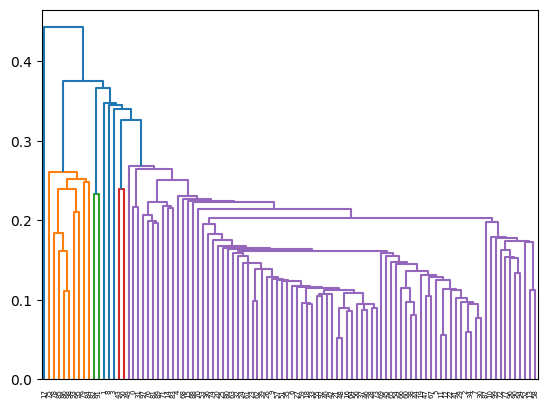

In [29]:
single = linkage(entropy_table.iloc[:,2:9], method = 'single')
dendrogram(single)

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Assuming 'data' is your feature matrix
c, coph_dists = cophenet(single, pdist(entropy_table.iloc[:,2:9]))
print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.7301988995688826


###**(iii) Average Linkage**

Average linkage is a method used in hierarchical clustering to compute the distance between two clusters. It calculates the average distance between all pairs of points in the two clusters.

The advantage of average linkage is that it tends to produce clusters of relatively uniform size and density, as it considers the average distance between all pairs of points in the clusters. This can be beneficial when dealing with datasets containing clusters of varying shapes and densities.

However, average linkage can be sensitive to outliers and noise, as it is influenced by the average distance between all points in the clusters. Additionally, it may struggle with forming compact, well-separated clusters, as it tends to merge clusters based solely on the average distance between their points.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [20.0, 20.0, 61.875, 61.875],
  [5.0, 5.0, 40.9375, 40.9375],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [240.0, 240.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [340.0, 340.0, 360.0, 360.0],
  [325.0, 325.0, 350.0, 350.0],
  [315.0, 315.0, 337.5, 337.5],
  [292.5, 292.5, 326.25, 326.25],
  [255.0, 255.0, 309.375, 309.375],
  [215.0, 215.0, 282.1875, 282.1875],
  [183.7

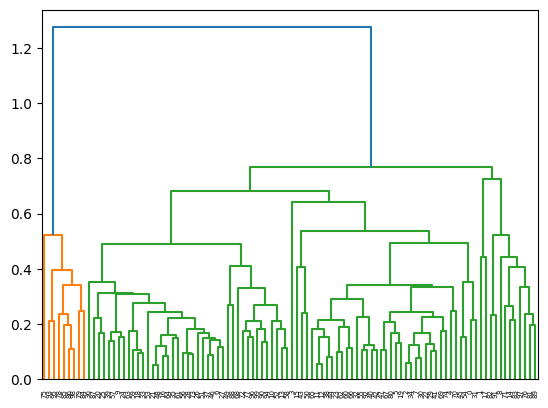

In [31]:
average = linkage(entropy_table.iloc[:,2:9], method = 'average')
dendrogram(average)

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Assuming 'data' is your feature matrix
c, coph_dists = cophenet(average, pdist(entropy_table.iloc[:,2:9]))
print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.8145673152579878


###**(iv) Centroid Linkage**

Also known as centroid-based linkage or Ward's linkage, is a method used in hierarchical clustering to compute the distance between two clusters. Instead of directly measuring the distance between individual points in the clusters, centroid linkage calculates the distance between the centroids (mean points) of the clusters.

The advantage of centroid linkage is that it tends to produce compact, well-separated clusters, as it focuses on the distance between the centroids of the clusters. This can be beneficial when dealing with datasets containing clusters of varying shapes and densities.

However, centroid linkage can be sensitive to outliers and noise, as it is influenced by the positions of the centroids. Additionally, it may struggle with forming elongated or irregularly shaped clusters, as it tends to merge clusters based solely on the distance between their centroids.

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [20.0, 20.0, 61.875, 61.875],
  [5.0, 5.0, 40.9375, 40.9375],
  [105.0, 105.0, 115.0, 115.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [152.5, 152.5, 183.75, 183.75],
  [135.0, 135.0, 168.125, 168.125],
  [125.0, 125.0, 151.5625, 151.5625],
  [110.0, 110.0, 138.28125, 138.28125],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [305.0, 305.0, 323.75, 323.75],
  [375.0, 375.0, 385.0, 385.0],
  [395.0, 395.0, 405.0, 405.0],
  [380.0, 380.0, 400.0, 400.0],
  [365.0, 365.0, 390.0, 390.0]

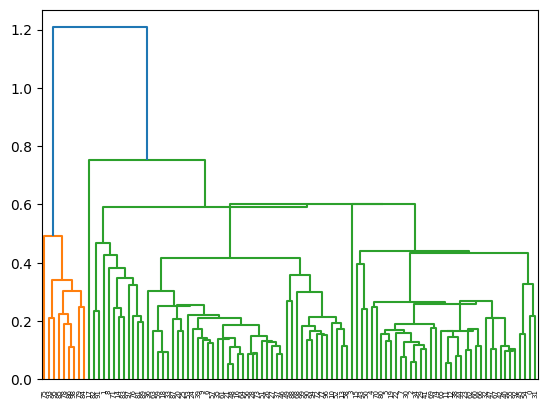

In [33]:
centroid = linkage(entropy_table.iloc[:,2:9], method = 'centroid')
dendrogram(centroid)

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

# Assuming 'data' is your feature matrix
c, coph_dists = cophenet(centroid, pdist(entropy_table.iloc[:,2:9]))
print(f'Cophenetic Correlation Coefficient: {c}')

Cophenetic Correlation Coefficient: 0.8084657783441939


##**Step 6: Investigating the Clusters**

At the conclusion of step 4, our task is to delve into the clusters and provide commentary based on their attributes. Additionally, we have the flexibility to introduce supplementary attributes to enrich our understanding of the clusters. In this project, we have focused on three primary attributes: population, GDP development, and terrain. Our objective is to discern patterns using these attributes.

To accomplish this, we will:

-> Conduct a thorough analysis of each cluster's characteristics, utilizing statistical measures such as mean, median, and standard deviation for population, GDP, and terrain.

-> Employ visual aids like bar plots and scatter plots to visualize attribute distributions within each cluster, facilitating comparison and pattern recognition.

-> Compare attributes across clusters to identify consistent differences or similarities, discerning patterns such as clusters with higher population densities, elevated GDP levels, or specific terrain types.

-> Explore the possibility of integrating additional attributes into our analysis, such as demographic data or socio-economic indicators, to augment our understanding of the clustering patterns.

-> Offer insightful commentary and interpretation on the clusters, highlighting noteworthy patterns, trends, and potential underlying factors driving these patterns.

By meticulously analyzing the clusters and their attributes, we aim to gain valuable insights into the inherent structure of the data and elucidate meaningful patterns that inform decision-making processes and drive further exploration

In [36]:
extra_attributes = pd.read_excel('Project1_FDA_v1.xlsx', sheet_name='Extra Attributes')

In [96]:
extra_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City         100 non-null    object
 1   Population   100 non-null    int64 
 2   Development  100 non-null    object
 3   Terrain      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [99]:
extra_attributes['Development'].describe()

count           100
unique            3
top       Developed
freq             65
Name: Development, dtype: object

In [100]:
df_comparison = pd.merge(entropy_table,extra_attributes,on = 'City',how='left')

In [101]:
df_comparison

,Region,City,φ,Ho,Hw,I,Ac,K,Pde,P4w,Cluster_Group,Population,Development,Terrain
0,Asia/Oceania,Bangkok,0.114827,0.921948,0.912720,0.197331,0.350365,0.030833,0.904891,0.091262,0,6704000,Developing,Flat
1,Asia/Oceania,Beijing,0.371237,0.729820,0.746279,0.735462,0.306569,0.530833,0.293478,0.349515,1,11106000,Developing,Varied
2,Asia/Oceania,Hanoi,0.008919,0.993996,0.993911,0.196378,0.394161,0.218333,0.595109,0.079612,0,4378000,Under Developed,Delta
3,Asia/Oceania,Hong Kong,0.011148,0.992662,0.987821,0.180172,0.919708,0.486667,0.236413,0.219417,0,7206000,Developed,Mountainous
4,Asia/Oceania,Jakarta,0.183946,0.872582,0.841678,0.141087,0.394161,0.327500,0.402174,0.067961,0,9125000,Under Developed,Lowland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.803790,0.306204,0.251015,0.352717,0.124088,0.632500,0.296196,0.598058,1,3643765,Developed,Coastal
96,US/Canada,St Louis,0.305463,0.782522,0.759134,0.399428,0.087591,0.680833,0.192935,0.607767,1,302838,Developed,Flat
97,US/Canada,Toronto,0.526198,0.598399,0.529093,0.380839,0.576642,0.538333,0.222826,0.302913,1,5213000,Developed,Basin
98,US/Canada,Vancouver,0.832776,0.270180,0.209743,0.383699,0.080292,0.800000,0.125000,0.765049,1,2313328,Developed,Coastal


In [102]:
file_path = '/content/drive/MyDrive/FDA/Dataset/ouput1.csv'
df_comparison.to_csv(file_path,index = False)

<Axes: xlabel='Development', ylabel='φ'>

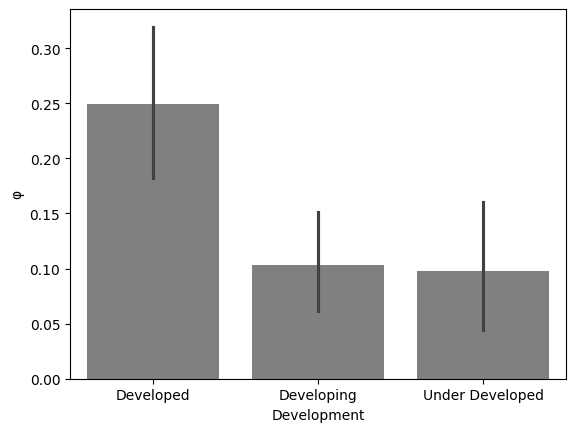

In [119]:
df_comparison = df_comparison.sort_values(by='Development', ascending=True)
sns.barplot(data = df_comparison, x='Development',y='φ',color = 'Grey')

The bar chart indicates that developed cities exhibit higher entropy, suggesting a potential correlation between development and road network quality. To delve deeper, let's examine the cluster groups.

<Axes: xlabel='Development', ylabel='φ'>

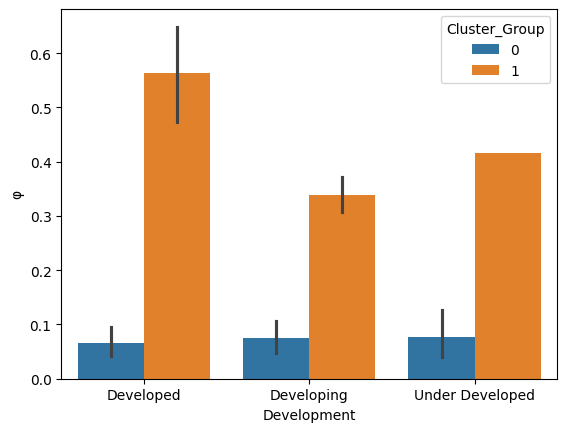

In [104]:
sns.barplot(data = df_comparison, x='Development',y='φ',hue = 'Cluster_Group')

The visualization above illustrates the relationship between entropy and development across one hundred cities. Notably, Cluster Group 1 encompasses the largest count of cities. Following this, the distribution reveals that Underdeveloped cities hold the second-highest count, with Developing cities trailing behind.

Conversely, Cluster Group 0 and the categories of Developing and Underdeveloped cities exhibit identical entropy levels. In contrast, the subset of Developed cities demonstrates the lowest entropy among all groups.

With this visualization, though most developed cities belong to cluster group 1, we cannot come to the conclusion that a city's development is the only factor which can effect the entropy. This is because, if the above statement is followed, developing cities must come second and under developed cities in the last, but it contradicts with the bar plot.

Let us look at few more visualizations to clear this ambiguity.

**Note: Higher the value of φ, better the road network**

In [105]:
df_grouped = df_comparison.groupby(['Terrain','Cluster_Group'])['City'].count()

In [106]:
df_grouped = pd.DataFrame(df_grouped)

<Axes: xlabel='Terrain', ylabel='City'>

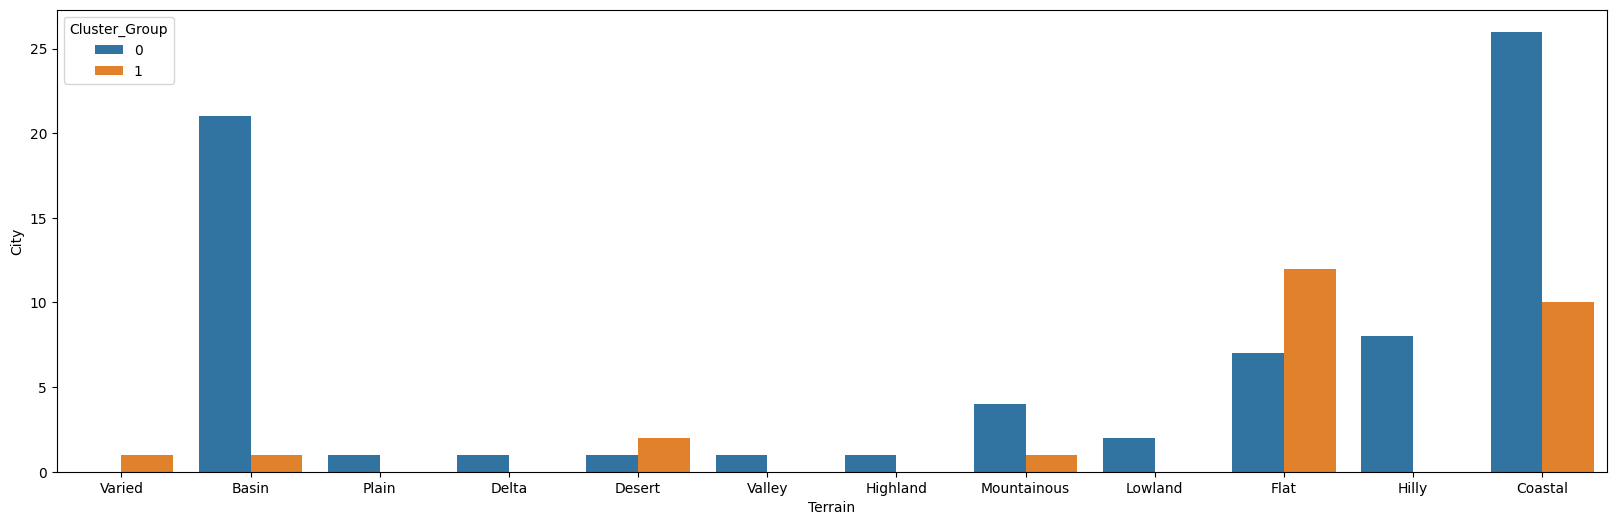

In [107]:
# df_grouped = df_grouped[df_grouped['Cluster_Group'] == 1]
# df_grouped
plt.figure(figsize=(20, 6))
df_grouped = df_grouped.sort_values(by='City', ascending=True)
sns.barplot(data = df_grouped, x='Terrain',y='City',hue = 'Cluster_Group')

The bar chart above underscores the significant influence of terrain on a city's road network. Notably, the distribution reveals a distinct clustering pattern: cities situated in basin, mountainous, and hilly terrains predominantly belong to cluster group 0, while those in flat and desert terrains are primarily associated with cluster group 1.

This robust clustering based on terrain reinforces our hypothesis, suggesting that terrain plays a pivotal role in shaping a city's road network infrastructure. The observation implies that constructing road networks in hilly areas may pose greater challenges compared to flat areas. The rugged terrain of hilly regions likely presents obstacles and complexities that hinder the development and maintenance of efficient road networks..

Nevertheless, the results leave room for further scrutiny, particularly regarding coastal terrains, which exhibit a notable presence in both cluster groups 0 and 1. To gain deeper insights into this phenomenon, let's conduct a more detailed examination to elucidate the underlying factors driving this pattern.

<Axes: xlabel='Population', ylabel='φ'>

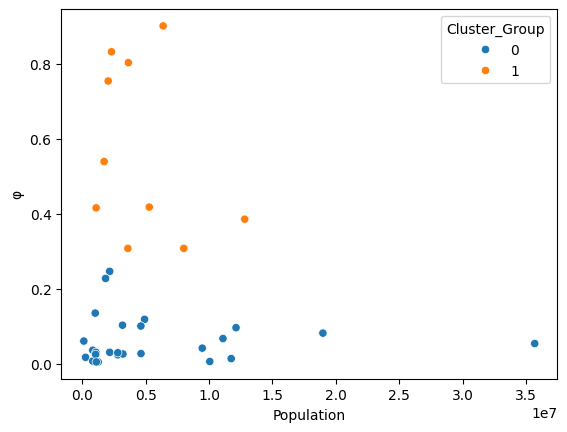

In [116]:
df_coastal = df_comparison[df_comparison['Terrain'] == 'Coastal']
sns.scatterplot(data = df_coastal, x='Population',y='φ',hue = 'Cluster_Group')

The scatter plot above depicts the distribution of all coastal cities based on their population and φ (entropy). Our hypothesis stands validated, as evidenced by the clustering pattern observed: cities with higher populations tend to exhibit lower entropy and are predominantly associated with group 0 clusters. Conversely, cities with lower populations tend to have higher entropy and are more prevalent in group 1 clusters.

Building upon our previous analysis of coastal terrains, it becomes apparent that the distribution of cities across cluster groups 0 and 1 was primarily influenced by population density. By isolating this factor, we eliminate ambiguity and gain clarity regarding the underlying patterns.

Consequently, we can draw the following conclusions:

1.) Group 0 clusters are characterized by cities with lower entropy levels. Factors such as population density, terrain characteristics, and development status likely contribute to the challenges faced by these cities in establishing robust road networks.

2.) Group 1 clusters predominantly comprise cities with higher entropy levels. These cities, typically more developed but with lower population densities, face distinct challenges in road network development. However, it's noteworthy that cities situated in flat and desert terrains possess inherent advantages for constructing efficient road networks, despite their higher entropy levels.

In summary, our analysis underscores the multifaceted nature of urban development and infrastructure planning, highlighting the interplay between population dynamics, terrain characteristics, and entropy levels in shaping the quality of road networks within coastal cities.

###**THE END**